In [49]:
import pandas as pd
import numpy as np
from pymystem3 import Mystem
import nltk
import re
# import artm
nltk.download('stopwords')
from nltk.corpus import stopwords
ru_stopwords = stopwords.words('russian')
from sklearn.feature_extraction.text import CountVectorizer

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yarem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
dataset = pd.read_csv('17_1.csv', delimiter='\t')
dataset.head()

,text,gender,age,numwords,userid,year
0,всегда хотела быть похожа на папу. потому что ...,1,17,12,1277864,2010
1,а знаешь какой праздник.? 5 месяцев 6 марта...,1,17,6,1277864,2010
2,не буду слишком надменной и глупой. глаза цвет...,1,17,13,1277864,2010
3,плакать от счастья.,1,17,3,1277864,2010
4,излишне трогательный.,1,17,2,1277864,2010


In [36]:
dataset_short = dataset.iloc[:20000].copy()
dataset_short.replace('þ<br />þ', '\n ', regex=True, inplace=True)
dataset_short.head()

,text,gender,age,numwords,userid,year
0,всегда хотела быть похожа на папу. потому что ...,1,17,12,1277864,2010
1,а знаешь какой праздник.? 5 месяцев 6 марта...,1,17,6,1277864,2010
2,не буду слишком надменной и глупой. глаза цвет...,1,17,13,1277864,2010
3,плакать от счастья.,1,17,3,1277864,2010
4,излишне трогательный.,1,17,2,1277864,2010


In [37]:
data = dataset_short['text'].tolist()
data[:2]

['всегда хотела быть похожа на папу. потому что всегда хотела быть счастливой.',
 'а знаешь какой праздник.? 5 месяцев 6 марта...']

In [38]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))
print(data_words[:2])

[['всегда', 'хотела', 'быть', 'похожа', 'на', 'папу', 'потому', 'что', 'всегда', 'хотела', 'быть', 'счастливои'], ['знаешь', 'какои', 'праздник', 'месяцев', 'марта']]


In [39]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)
# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['всегда', 'хотела', 'быть', 'похожа', 'на', 'папу', 'потому', 'что', 'всегда', 'хотела', 'быть', 'счастливои']


In [40]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in ru_stopwords] for doc in texts]
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]
def lemmatization(texts):
    texts_out = []
    for sent in texts:
        doc = stem.lemmatize(" ".join(sent)) 
        texts_out.append([token for token in doc if token != ' ' and token != '\n'])
    return texts_out

In [41]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)
# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
stem = Mystem()
# nlp = spacy.load('ru', disable=['parser', 'ner'])
# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams)
print(data_lemmatized[:1])

[['хотеть', 'похожий', 'папа', 'хотеть', 'счастливой']]


In [42]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)
# Create Corpus
texts = data_lemmatized
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1])


[[(0, 1), (1, 1), (2, 1), (3, 2)]]


In [89]:
corpus

[[(0, 1), (1, 1), (2, 1), (3, 2)],
 [(4, 1), (5, 1), (6, 1), (7, 1), (8, 1)],
 [(9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1)],
 [(19, 1), (20, 1)],
 [(21, 1), (22, 1)],
 [(23, 1), (24, 1)],
 [(4, 1), (25, 1)],
 [(24, 1), (26, 1), (27, 1), (28, 1)],
 [(29, 1), (30, 1)],
 [(30, 1), (31, 1)],
 [(32, 1), (33, 1), (34, 1), (35, 1), (36, 1)],
 [(3, 1), (37, 1), (38, 1), (39, 1), (40, 1)],
 [(41, 1), (42, 1)],
 [(43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1)],
 [(24, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1)],
 [(3, 1), (60, 1), (61, 1), (62, 1), (63, 1)],
 [(19, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1)],
 [(24, 1), (37, 1), (70, 1)],
 [(24, 1), (71, 1), (72, 1), (73, 1)],
 [(13, 1),
  (24, 1),
  (73, 2),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1)],
 [(81, 1), (82, 1), (83, 1)],
 [(84, 1), (85, 2), (

In [43]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('папа', 1), ('похожий', 1), ('счастливой', 1), ('хотеть', 2)]]

In [44]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [46]:
lda_model.print_topics()

[(0,
  '0.095*"мир" + 0.088*"мы" + 0.062*"надеяться" + 0.060*"место" + 0.041*"видео" + 0.040*"часто" + 0.024*"весело" + 0.021*"прекрасныи" + 0.013*"роль" + 0.004*"сыграть"'),
 (1,
  '0.400*"хотеть" + 0.097*"жить" + 0.024*"ребенок" + 0.013*"папа" + 0.009*"похожий" + 0.006*"красиво" + 0.006*"легкий" + 0.004*"внутри" + 0.000*"который" + 0.000*"тобой"'),
 (2,
  '0.192*"понимать" + 0.089*"никто" + 0.084*"нужный" + 0.026*"март" + 0.024*"кроме" + 0.006*"кровь" + 0.000*"который" + 0.000*"ходить" + 0.000*"комната" + 0.000*"начинать"'),
 (3,
  '0.067*"вернуть" + 0.055*"домои" + 0.030*"вода" + 0.023*"забирать" + 0.021*"детея" + 0.016*"ухо" + 0.014*"пиздец" + 0.009*"женя" + 0.004*"ржать" + 0.000*"русалка"'),
 (4,
  '0.209*"знать" + 0.162*"твой" + 0.052*"слово" + 0.052*"рядом" + 0.048*"девочка" + 0.048*"лишь" + 0.031*"улыбка" + 0.020*"история" + 0.018*"чужой" + 0.010*"взгляд"'),
 (5,
  '0.335*"_" + 0.071*"самый" + 0.061*"хороший" + 0.040*"один" + 0.033*"спать" + 0.028*"скоро" + 0.027*"ночь" + 0.022

In [47]:
import yaml
with open('topics_20000.yaml', 'w') as file:
    yaml.dump(dict(lda_model.print_topics()), file)

In [51]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -21.560645904393095

Coherence Score:  0.3816593186896556


In [87]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(optimal_model, corpus, id2word)
vis

c:\Users\yarem\AppData\Local\Programs\Python\Python310\lib\site-packages\pyLDAvis\_prepare.py:244: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
12    -0.236985  0.040242       1        1  24.447182
9     -0.180780  0.100836       2        1  10.986015
11    -0.130608 -0.098171       3        1  10.786672
8     -0.128616 -0.078484       4        1  10.655437
10    -0.039089 -0.036114       5        1   6.106279
6      0.077936  0.277935       6        1   6.053692
0      0.000329 -0.038534       7        1   4.435174
7      0.081347 -0.020494       8        1   4.348082
1      0.057408  0.004765       9        1   4.169153
5      0.052617 -0.049345      10        1   4.037011
3      0.076897  0.052356      11        1   3.915227
13     0.077312 -0.062497      12        1   3.879424
2      0.139491 -0.053816      13        1   3.377561
4      0.152740 -0.038679      14        1   2.803092, topic_info=        Term         Freq        Total Category  logprob  loglift
74         _  5505.000000  5505.000000  Default  30.0000  30.0000
220     день  1768.000000  1768.000000  Default  29.0000  29.0000
33    любить  2136.000000  2136.000000  Default  28.0000  28.0000
1025    http   526.000000   526.000000  Default  27.0000  27.0000
252       id   584.000000   584.000000  Default  26.0000  26.0000
...      ...          ...          ...      ...      ...      ...
430     идти    52.806878   429.926500  Topic14  -4.7685   1.4775
1178  звезда    32.547597    74.251231  Topic14  -5.2524   2.7497
2858   фотка    37.536320   163.894575  Topic14  -5.1098   2.1005
983   солнце    35.212122   122.366867  Topic14  -5.1737   2.3288
9       быть    32.830764  1365.484726  Topic14  -5.2438  -0.1535

[939 rows x 6 columns], token_table=      Topic      Freq Term
term                      
74        1  0.300232    _
74        2  0.243746    _
74        3  0.005449    _
74        4  0.016528    _
74        5  0.012532    _
...     ...       ...  ...
479       2  0.032003   эх
479       6  0.016001   эх
479       8  0.880074   эх
479      11  0.048004   эх
5463     14  0.940786    я

[3048 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[13, 10, 12, 9, 11, 7, 1, 8, 2, 6, 4, 14, 3, 5])

In [54]:
!unzip './mallet-2.0.8.zip'

unzip:  cannot find either './mallet-2.0.8.zip' or './mallet-2.0.8.zip'.zip.


In [55]:
mallet_path = './mallet-2.0.8/mallet-2.0.8/bin/mallet' # update this path
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)

AttributeError: module 'gensim.models' has no attribute 'wrappers'

In [60]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics
    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics
    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [61]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=6)

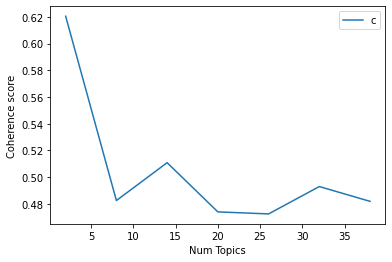

In [62]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [63]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.6205
Num Topics = 8  has Coherence Value of 0.4825
Num Topics = 14  has Coherence Value of 0.5108
Num Topics = 20  has Coherence Value of 0.474
Num Topics = 26  has Coherence Value of 0.4724
Num Topics = 32  has Coherence Value of 0.4929
Num Topics = 38  has Coherence Value of 0.4819


In [71]:
optimal_model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=14, id2word=id2word)

In [72]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()
    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']
    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)
df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)
# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
# Show
df_dominant_topic.head(10)

C:\Users\yarem\AppData\Local\Temp\ipykernel_16436\2965365211.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\yarem\AppData\Local\Temp\ipykernel_16436\2965365211.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,7,0.5538,"id, привет, блин, хотеть, приветик, сегодня, т...",всегда хотела быть похожа на папу. потому что ...
1,1,10,0.5263,"xd, писать, ето, встречаться, наш, первый, сук...",а знаешь какой праздник.? 5 месяцев 6 марта...
2,2,12,0.5888,"любить, _, мой, ты, очень, спасибо, это, быть,...",не буду слишком надменной и глупой. глаза цвет...
3,3,11,0.3622,"знать, это, помнить, сказать, ахи, завтра, моч...",плакать от счастья.
4,4,5,0.5399,"пойти, написать, супер, приезжать, оч, почему,...",излишне трогательный.
5,5,8,0.6904,"это, человек, понимать, свой, сделать, глаз, т...",это называется она.
6,6,11,0.6905,"знать, это, помнить, сказать, ахи, завтра, моч...",я не знаю зачем так делаю.
7,7,3,0.8143,"спать, _, кстати, хд, instagram, ха, уставать,...",это закончилось. рано или поздно.
8,8,5,0.5357,"пойти, написать, супер, приезжать, оч, почему,...",помешанная тварь.
9,9,12,0.3618,"любить, _, мой, ты, очень, спасибо, это, быть,...",тварь соскучилась.


In [75]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0,7,"id, привет, блин, хотеть, приветик, сегодня, т...",1778.0,0.0889
1,10,"xd, писать, ето, встречаться, наш, первый, сук...",746.0,0.0373
2,12,"любить, _, мой, ты, очень, спасибо, это, быть,...",624.0,0.0312
3,11,"знать, это, помнить, сказать, ахи, завтра, моч...",750.0,0.0375
4,5,"пойти, написать, супер, приезжать, оч, почему,...",607.0,0.0304
...,...,...,...,...
19995,8,"это, человек, понимать, свой, сделать, глаз, т...",NaN,NaN
19996,0,"думать, такой, тело, любить, утро, фильм, сост...",NaN,NaN
19997,12,"любить, _, мой, ты, очень, спасибо, это, быть,...",NaN,NaN
19998,12,"любить, _, мой, ты, очень, спасибо, это, быть,...",NaN,NaN


In [86]:
for i, j in zip(df_dominant_topics['Topic_Keywords'][:14], df_dominant_topics['Num_Documents']):
    print(i)

id, привет, блин, хотеть, приветик, сегодня, тот, нормально, отлично, вчера
xd, писать, ето, встречаться, наш, первый, сука, время, ребенок, проходить
любить, _, мой, ты, очень, спасибо, это, быть, год, самый
знать, это, помнить, сказать, ахи, завтра, мочь, просто, говорить, жить
пойти, написать, супер, приезжать, оч, почему, тож, ехать, слушать, снова
это, человек, понимать, свой, сделать, глаз, такой, твой, который, посмотреть
знать, это, помнить, сказать, ахи, завтра, мочь, просто, говорить, жить
спать, _, кстати, хд, instagram, ха, уставать, давай, ночь, http
пойти, написать, супер, приезжать, оч, почему, тож, ехать, слушать, снова
любить, _, мой, ты, очень, спасибо, это, быть, год, самый
любить, _, мой, ты, очень, спасибо, это, быть, год, самый
думать, такой, тело, любить, утро, фильм, состояние, игра, полный, цена
любить, _, мой, ты, очень, спасибо, это, быть, год, самый
думать, такой, тело, любить, утро, фильм, состояние, игра, полный, цена


In [74]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0,7,"id, привет, блин, хотеть, приветик, сегодня, т...",1778.0,0.0889
1,10,"xd, писать, ето, встречаться, наш, первый, сук...",746.0,0.0373
2,12,"любить, _, мой, ты, очень, спасибо, это, быть,...",624.0,0.0312
3,11,"знать, это, помнить, сказать, ахи, завтра, моч...",750.0,0.0375
4,5,"пойти, написать, супер, приезжать, оч, почему,...",607.0,0.0304
...,...,...,...,...
19995,8,"это, человек, понимать, свой, сделать, глаз, т...",NaN,NaN
19996,0,"думать, такой, тело, любить, утро, фильм, сост...",NaN,NaN
19997,12,"любить, _, мой, ты, очень, спасибо, это, быть,...",NaN,NaN
19998,12,"любить, _, мой, ты, очень, спасибо, это, быть,...",NaN,NaN


In [9]:
def lemmatize_sents(sents):
    for sent in sents:
        yield [i for i in stem.lemmatize(sent) if not (re.match(r'[^\w\s]', i) is not None or i ==' ' or i =='\n') ]

In [10]:
dataset_short_lemmatized = list(lemmatize_sents(dataset_short['text']))

In [12]:
cv = CountVectorizer(max_features=1000, stop_words=ru_stopwords)
n_wd = np.array(cv.fit_transform(list(dataset['text'])[:500_000]).todense()).T
vocabulary = cv.get_feature_names_out ()

c:\Users\yarem\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [29]:
# bv = artm.BatchVectorizer(data_format='bow_n_wd',
#                           n_wd=n_wd,
#                           vocabulary=vocabulary)

In [36]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)
# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

'þты'